In [1]:
from recruitment_plotting import plot_parametric_recruitment, plot_recruitment_curves, plot_parametric_recruitment
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Make dummy threshold data dictionary
# Polar = 90, distribute thresholds from a (nonrandom) normal distribution across azimuths
# Make four distributions for each case: two "cells" and two "pulses"
# Cases: 1) No difference, 2) One pulse is stronger, 3) One cell is more excitable, 4) Diverging curves (targeting)

In [3]:
num_thresholds = 1000
azimuthals = np.linspace(0, 360, num_thresholds, endpoint=False)
polar = 90
cells = [1, 2]
pulses = [1, 2]
cases = ["No Difference", "Stronger Pulse", "Excitable Cell", "Targeting"]
case_IDs = [f"{case}_{cell}_{pulse}" for case in cases for cell in cells for pulse in pulses]
m1 = 400 # mean threshold for weaker cases
m2 = 300 # mean threshold for stronger cases
o = 4 # offset
means = [m1, m1-o, m1-o, m1, # No Difference
         m2, m1, m2-o, m1+o, # Stronger Pulse
         m2, m2-o, m1, m1+o, # Excitable Cell
         m2, m1, m1+o, m2-o] # Targeting
std = 50

u = np.linspace(0.001, 0.999, num_thresholds)

cell_angles_list = [[case_ID, polar, azimuthal] for case_ID in case_IDs for azimuthal in azimuthals]
thresholds = [thresh for mean in means for thresh in norm.ppf(u, loc=mean, scale=std)]

threshold_map = {}
for case_ID in case_IDs:
    threshold_map[case_ID] = {'Polar': {}}
    threshold_map[case_ID]['Polar'][polar] = {'Azimuthal': {}}

for [case_ID, polar, azimuthal], threshold in zip(cell_angles_list, thresholds):
    threshold_map[case_ID]['Polar'][polar]['Azimuthal'][azimuthal] = {'threshold': threshold}



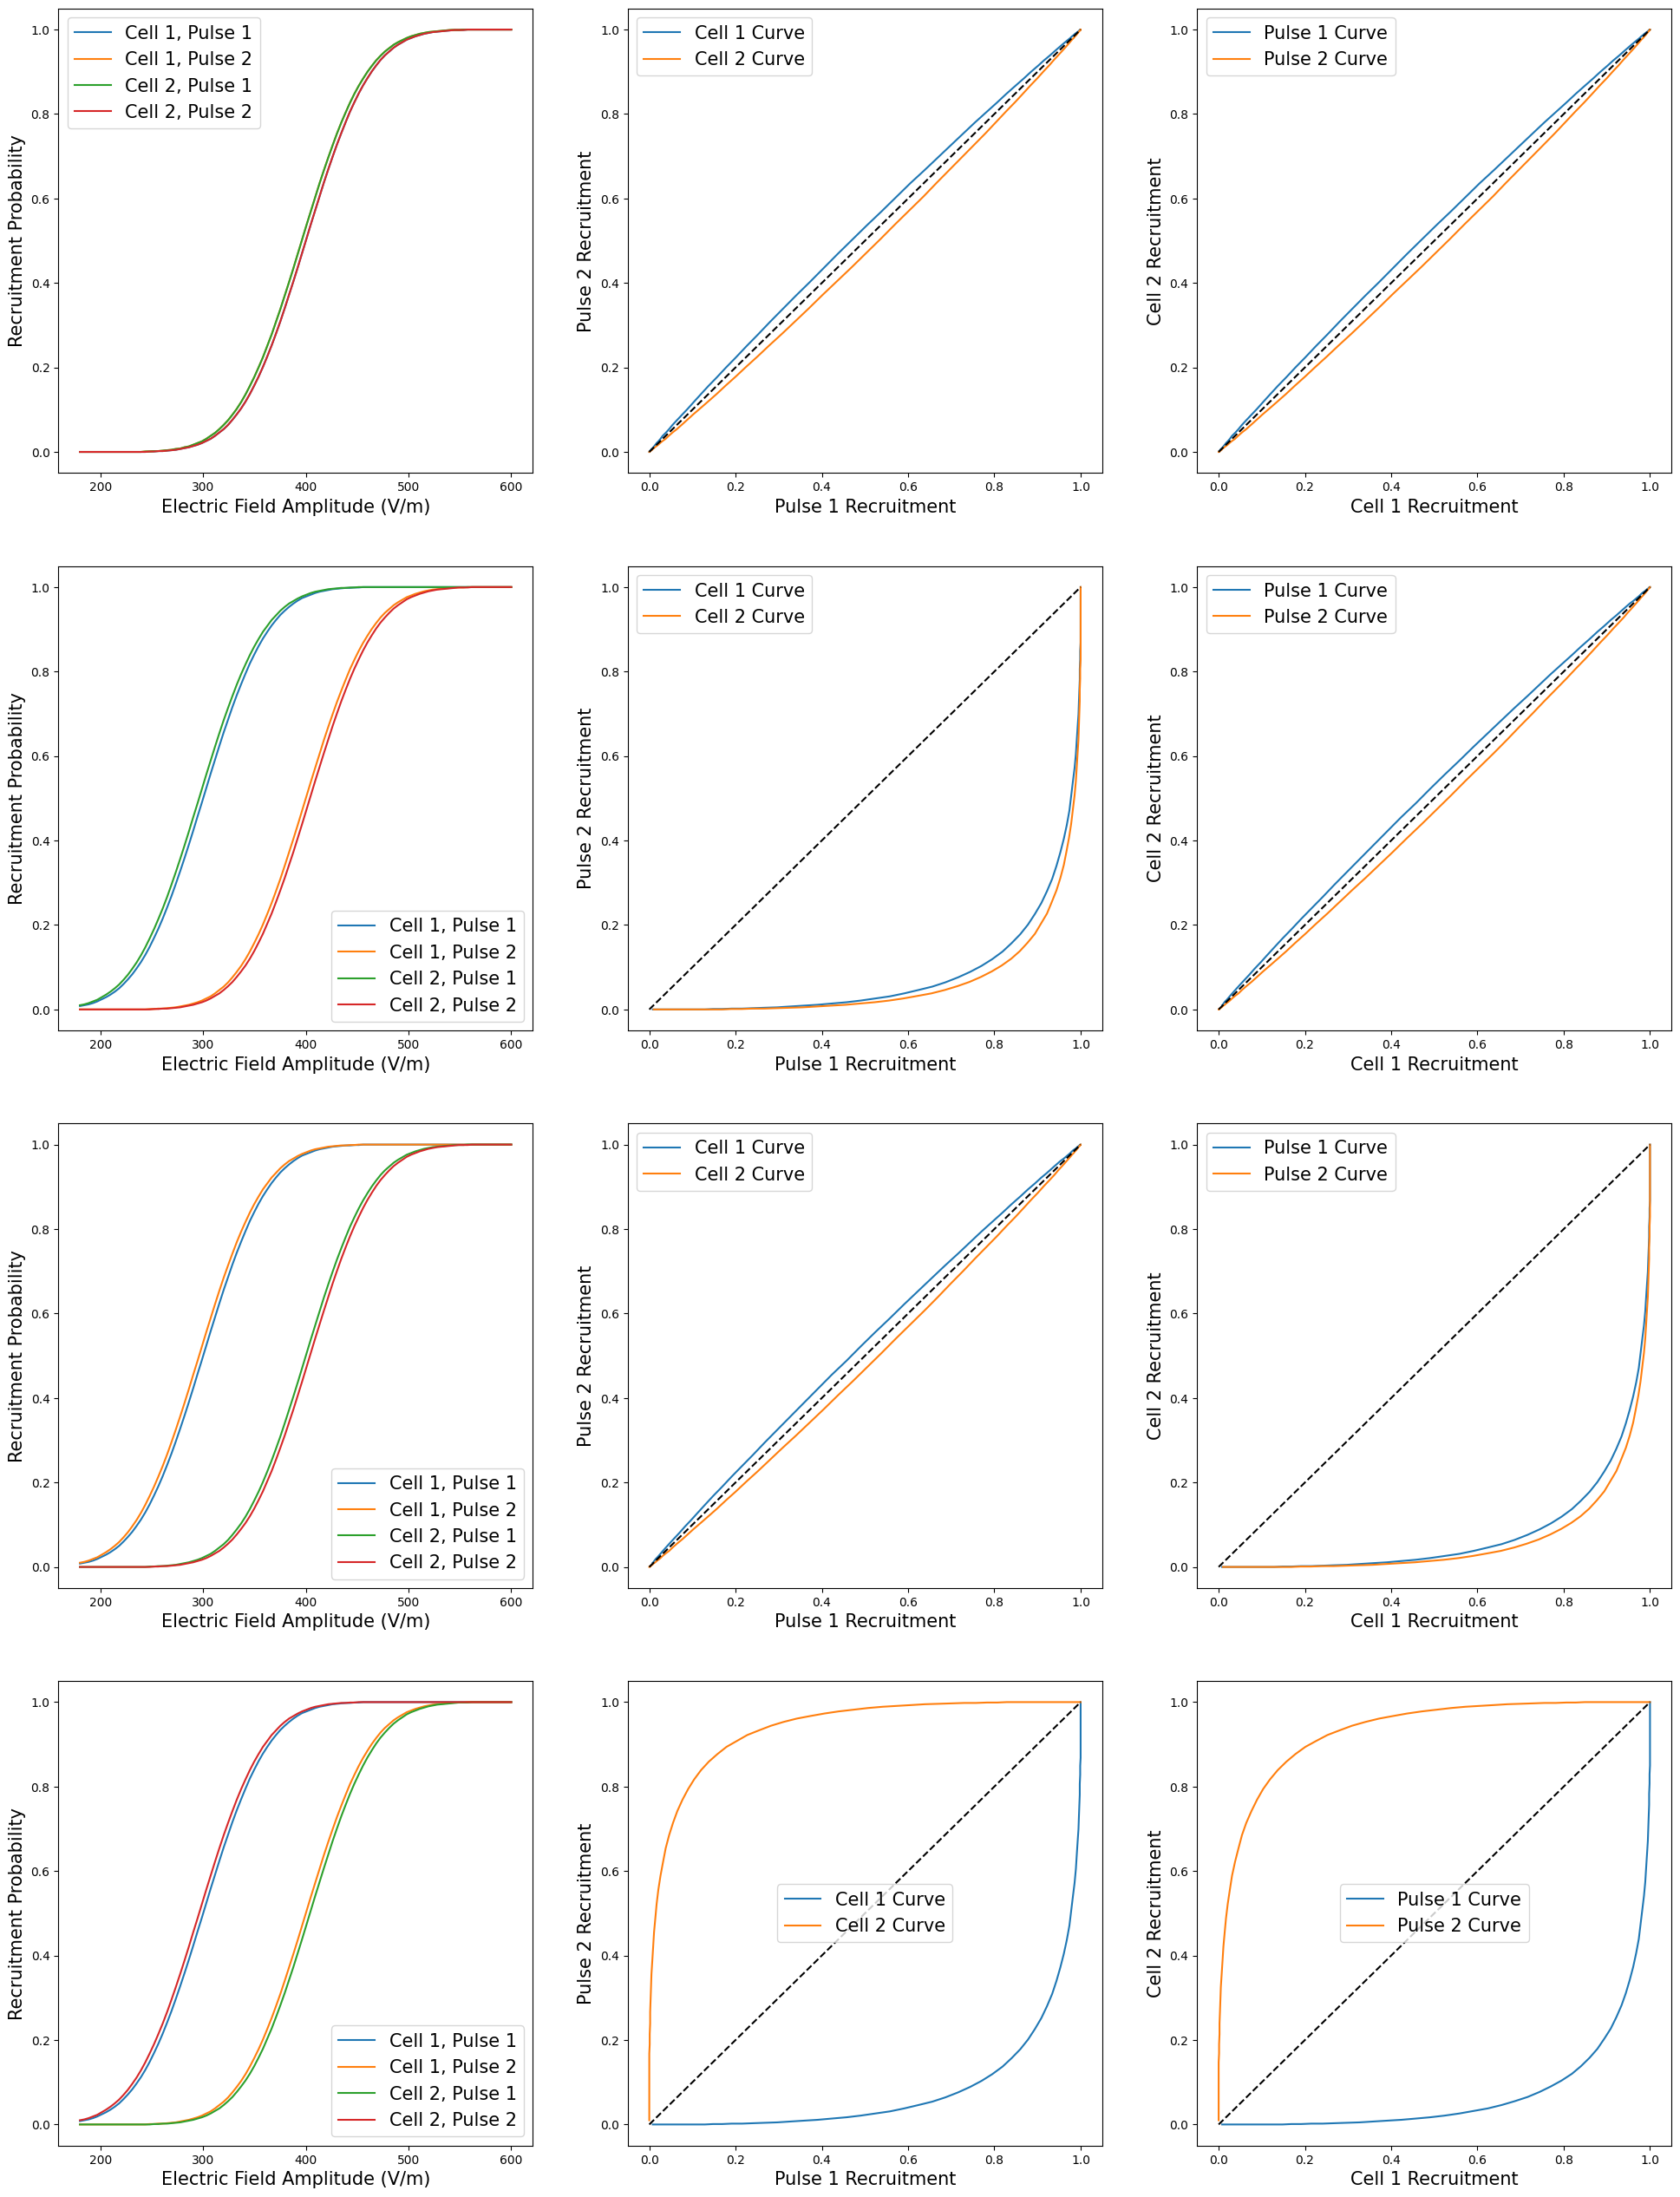

In [4]:
efield_min = 180
efield_max = 600
num_efield_points = 100

fig, axs = plt.subplots(4, 3, figsize=(24, 32))

# Plot the recruitment curves for the four cases
for i, (case, ax) in enumerate(zip(cases, axs)):
    plot_case_IDs = [f"{case}_{cell}_{pulse}" for cell in cells for pulse in pulses]
    plot_nums = [[i+1] for i, case_ID in enumerate(case_IDs) if case_ID in plot_case_IDs]
    title = None

    # Plot the recruitment curves
    # if i == 0: title = f"Recruitment Curves"
    legend = [f"Cell {cell}, Pulse {pulse}" for cell in cells for pulse in pulses]
    thresholds_list = [threshold_map for _ in plot_nums]
    plot_recruitment_curves(thresholds_list, efield_min, efield_max, num_efield_points, legend, morphs_list=plot_nums, title=title, ax=ax[0])

    # Plot the pulse comparison
    # if i == 0: title = f"Pulse Recruitment Comparison"
    legend = [f"Cell {cell}" for cell in cells]
    thresholds_list = [threshold_map for _ in plot_nums]
    xlabel = "Pulse 1 Recruitment"
    ylabel = "Pulse 2 Recruitment"
    # Group by cell
    thresholds_lists = np.array(thresholds_list)[[[0, 1], [2, 3]]].tolist()
    plot_nums_lists = np.array(plot_nums)[[[0, 1], [2, 3]]].tolist()
    plot_parametric_recruitment(thresholds_lists, efield_min, efield_max, num_efield_points, legend, xlabel, ylabel, morphs_lists=plot_nums_lists, title=title, ax=ax[1])

    # Plot the cell comparison
    # if i == 0: title = f"Cell Recruitment Comparison"
    legend = [f"Pulse {pulse}" for pulse in pulses]
    thresholds_list = [threshold_map for _ in plot_nums]
    xlabel = "Cell 1 Recruitment"
    ylabel = "Cell 2 Recruitment"
    # Group by pulse
    thresholds_lists = np.array(thresholds_list)[[[0, 2], [1, 3]]].tolist()
    plot_nums_lists = np.array(plot_nums)[[[0, 2], [1, 3]]].tolist()
    plot_parametric_recruitment(thresholds_lists, efield_min, efield_max, num_efield_points, legend, xlabel, ylabel, morphs_lists=plot_nums_lists, title=title, ax=ax[2])


Monophasic Pulse Profile @ 300 V/m: (0.758, 0.317)
Half-Sine Pulse Profile @ 300 V/m: (0.712, 0.277)


<Axes: xlabel='L5 PC Recruitment', ylabel='L5 LBC Recruitment'>

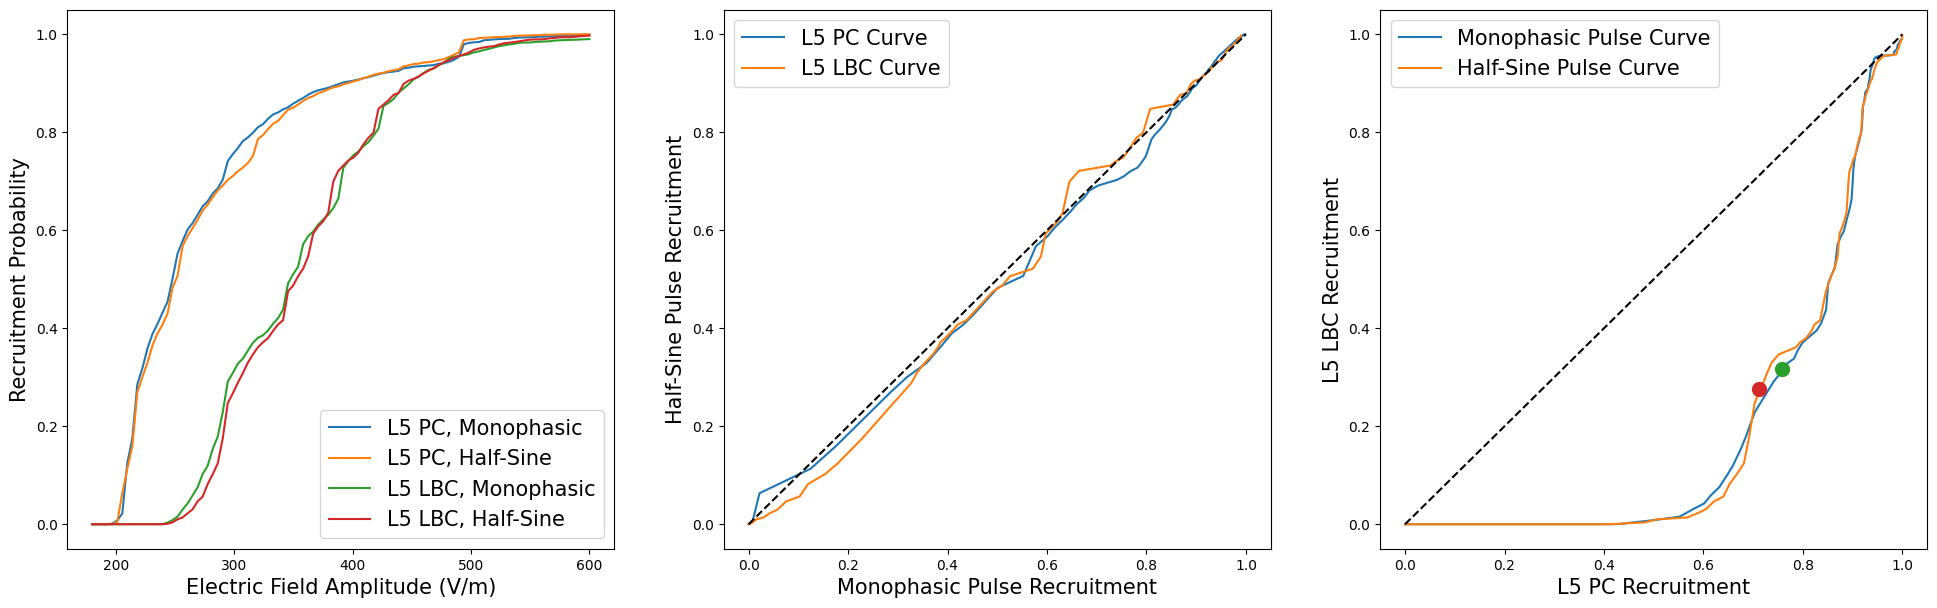

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(24, 7))

exc_monophasic_name = 'L5_TTPC2_cADpyr_monophasic'
exc_half_sine_name = 'L5_TTPC2_cADpyr_half_sine'
inh_monophasic_name = 'L5_LBC_cNAC_monophasic'
inh_half_sine_name = 'L5_LBC_cNAC_half_sine'
exc_monophasic_fname = f'data/tms_thresholds/{exc_monophasic_name}/{exc_monophasic_name}_results.json'
exc_half_sine_fname = f'data/tms_thresholds/{exc_half_sine_name}/{exc_half_sine_name}_results.json'
inh_monophasic_fname = f'data/tms_thresholds/{inh_monophasic_name}/{inh_monophasic_name}_results.json'
inh_half_sine_fname = f'data/tms_thresholds/{inh_half_sine_name}/{inh_half_sine_name}_results.json'
fname_list = [exc_monophasic_fname, exc_half_sine_fname, inh_monophasic_fname, inh_half_sine_fname]
morphs_lists = [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 4, 5], [1, 4, 5]]
legend = ["L5 PC, Monophasic", "L5 PC, Half-Sine", "L5 LBC, Monophasic", "L5 LBC, Half-Sine"]

plot_recruitment_curves(fname_list, efield_min, efield_max, num_efield_points, legend, morphs_lists, ax=axs[0])

fname_lists1 = [[exc_monophasic_fname, exc_half_sine_fname], [inh_monophasic_fname, inh_half_sine_fname]]
morphs_lists1 = [[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]], [[1, 4, 5], [1, 4, 5]]]

efields = np.linspace(180, 600, 50)
legend = ["L5 PC", "L5 LBC"]
xlabel = "Monophasic Pulse Recruitment"
ylabel = "Half-Sine Pulse Recruitment"

plot_parametric_recruitment(fname_lists1, efield_min, efield_max, num_efield_points, legend, xlabel, ylabel, morphs_lists=morphs_lists1, ax=axs[1])

fname_lists2 = [[exc_monophasic_fname, inh_monophasic_fname], [exc_half_sine_fname, inh_half_sine_fname]]
morphs_lists2 = [[[1, 2, 3, 4, 5], [1, 4, 5]], [[1, 2, 3, 4, 5], [1, 4, 5]]]

legend = ["Monophasic Pulse", "Half-Sine Pulse"]
xlabel = "L5 PC Recruitment"
ylabel = "L5 LBC Recruitment"
efield_profile = 300

plot_parametric_recruitment(fname_lists2, efield_min, efield_max, num_efield_points, legend, xlabel, ylabel, morphs_lists=morphs_lists2, efield_profile=efield_profile, ax=axs[2])